<a href="https://colab.research.google.com/github/DeepaliSaini4/Machine-Learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline SVM Accuracy: 1.0000
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Best Cross-Validation Score: 0.9619
Test Accuracy with Best Parameters: 0.9778

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



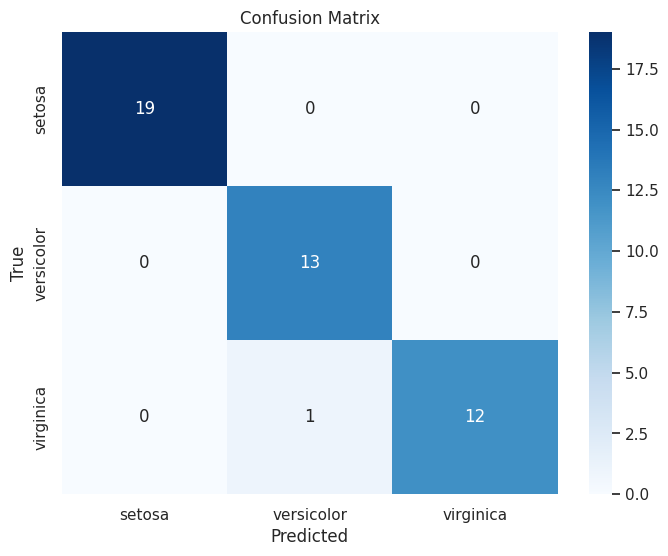

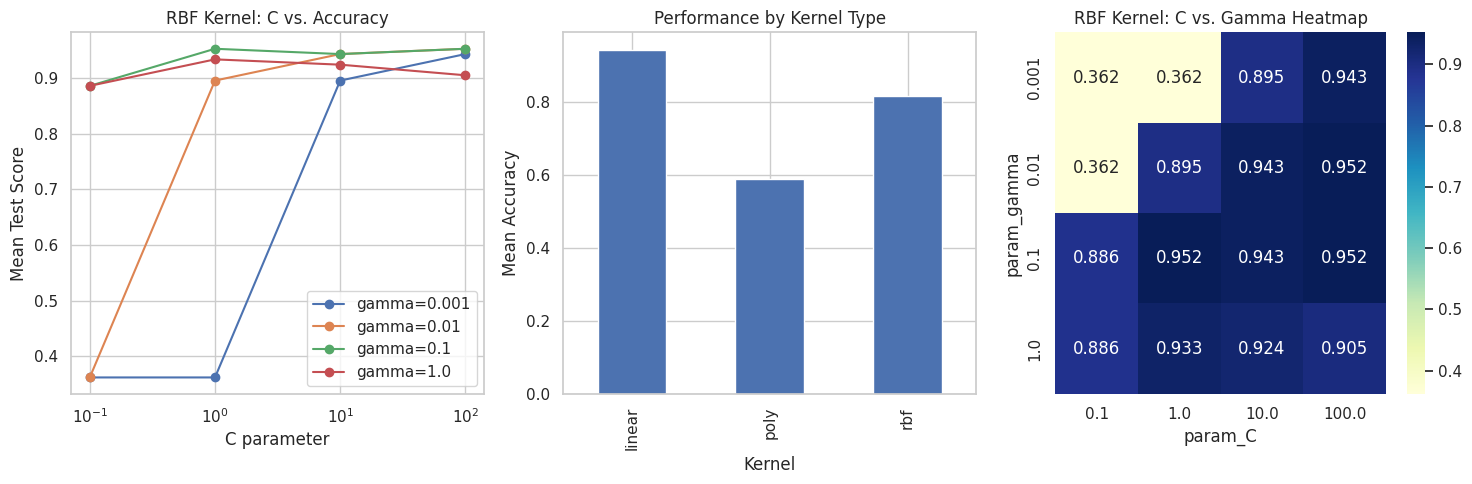

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a baseline SVM model
baseline_svm = SVC(random_state=42)
baseline_svm.fit(X_train_scaled, y_train)
baseline_accuracy = baseline_svm.score(X_test_scaled, y_test)
print(f"Baseline SVM Accuracy: {baseline_accuracy:.4f}")

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Create Grid Search CV
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

# Fit Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate model with best parameters on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot CV results for comparison
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15, 5))

# Plot C parameter vs mean test score for rbf kernel
plt.subplot(1, 3, 1)
rbf_results = results[results['param_kernel'] == 'rbf']
C_values = rbf_results['param_C'].astype(float)
for gamma in sorted(rbf_results['param_gamma'].unique()):
    subset = rbf_results[rbf_results['param_gamma'] == gamma]
    plt.plot(subset['param_C'], subset['mean_test_score'],
             marker='o', label=f'gamma={gamma}')
plt.xscale('log')
plt.xlabel('C parameter')
plt.ylabel('Mean Test Score')
plt.title('RBF Kernel: C vs. Accuracy')
plt.legend()

# Plot kernel comparison
plt.subplot(1, 3, 2)
kernel_means = results.groupby('param_kernel')['mean_test_score'].mean()
kernel_means.plot(kind='bar')
plt.xlabel('Kernel')
plt.ylabel('Mean Accuracy')
plt.title('Performance by Kernel Type')

# Plot C vs Gamma heatmap for rbf kernel
plt.subplot(1, 3, 3)
pivot_table = rbf_results.pivot_table(
    values='mean_test_score',
    index='param_gamma',
    columns='param_C'
)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('RBF Kernel: C vs. Gamma Heatmap')
plt.tight_layout()
plt.show()
